One algorithm for finding the shortest path from a starting node to a target node in a weighted graph is Dijkstra’s algorithm. The algorithm creates a __tree of shortest paths__ from the starting vertex, the source, to all other points in the graph.

The graph can either be __directed or undirected__. One stipulation to using the algorithm is that the graph needs to have a __nonnegative weight on every edge__.

The __closer edges will be relaxed first__. As a result, the parent of each node is as follows:

_Initializing three values_

- `dist`, an array of distances from the source node ss to each node in the graph, initialized the following way: `distdist(s) = 0`; and for all other nodes `v`, `dist(v) = \infty`. This is done at the beginning because as the algorithm proceeds, the distdist from the source to each node `v` in the graph will be recalculated and finalized when the shortest distance to `v` is found.
- `Q`, a queue of all nodes in the graph. At the end of the algorithm's progress, `Q` will be empty.
- `S`, an empty set, to indicate which nodes the algorithm has visited. At the end of the algorithm's run, `S` will contain all the nodes of the graph.

_The algorithm proceeds as follows_

1. While `Q` is not empty, pop the node `v`, that is not already in `S`, from `Q` with the __smallest__ `dist(v)`. In the first run, source node `s` will be chosen because `dist(s)` was initialized to 0. In the next run, the next node with the smallest `dist` value is chosen.
2. Add node `v` to `S`, to indicate that `v` has been visited.
3. Update `dist` values of adjacent nodes of the current node `v` as follows: for each new adjacent node `u`,
    - if `dist(v) + weight(u,v) < dist(u)`, there is a new minimal distance found for `u`, so update `dist(u)` to the new minimal distance value;
    - otherwise, no updates are made to distdist (uu).
    
The algorithm has visited all nodes in the graph and found the smallest distance to each node. `dist` now contains the shortest path tree from source `s`.

_Implementation_

```
function Dijkstra(Graph, source):
    dist[source]  := 0                     // Distance from source to source is set to 0
    for each vertex v in Graph:            // Initializations
        if v ≠ source
           dist[v]  := infinity           // Unknown distance function from source to each node set to infinity
        add v to Q                         // All nodes initially in Q

    while Q is not empty:                  // The main loop
        v := vertex in Q with min dist[v]  // In the first run-through, this vertex is the source node
        remove v from Q 

        for each neighbor u of v:           // where neighbor u has not yet been removed from Q.
            alt := dist[v] + length(v, u)
            if alt < dist[u]:               // A shorter path to u has been found
                dist[u]  := alt             // Update distance of u 
                add u to Q                  // Add u to heap

    return dist[]
end function
```

In [3]:
from heapq import heappop, heappush

def dijkstra(start, graph):
    n = len(graph)
    dist = [float('inf') for _ in range(n)]
    heap = []
    visited = [False for _ in range(n)]
    
    heappush = (heap, (0, start))
    dist[start] = 0
    
    while len(heap) > 0:
        d,v = heappop(heap)
        visited[v] = True
        
        if dist[v] < d:
            continue
            
        for u, wieght_u_v in graph:
            if not visited[u] and dist[u] > d + wieght_u_v:
                dist[u] = d + wieght_u_v
                heappush(heap, (dist[u], u))

    return dist

__example__

Given an adjacency matrix with weights of edges instead of 0 and 1 (if there is no edge between the vertices that value is replaced with `float("inf"))` and a pair of vertices `v_form` and `v_to` find the shortest path between those vertices using the Dijkstra's algorithm.

If there is no such path output -1

In [2]:
from heapq import heappop, heappush

def dijkstra(adj_matrix, v_from, v_to):
    n, graph = len(adj_matrix), adj_matrix

    distance = [float("inf") for i in range(n)]
    heap = []
    used = [False for i in range(n)]

    # YOUR CODE GOES HERE              
    heappush(heap, (0, v_from))
    distance[v_from] = 0
    
    while len(heap) > 0:
        d, v = heappop(heap)
        used[v] = True
        
        if distance[v] < d:
            continue
            
        for u in range(n):
            if not used[u] and adj_matrix[v][u] != float('inf') and distance[u] > (d + adj_matrix[v][u]):
                distance[u] = d + adj_matrix[v][u]
                heappush(heap, (distance[u], u))

    if distance[v_to] == float('inf'):
        distance[v_to] = -1
        
#     print(distance)
    return distance[v_to]

adj_matrix1 = [[float('inf'), 5, 2], 
                 [5, float('inf'), float('inf')], 
                 [2, float('inf'), float('inf')]]

adj_matrix2 = [[float('inf'), 5, 2, 1], 
             [5, float('inf'), float('inf'),float('inf')], 
             [2, float('inf'), float('inf'),float('inf')],
             [1, float('inf'), float('inf'),float('inf')]]

adj_matrix3 = [[float('inf'), 3, 2, float('inf'), float('inf')],
                [3, float('inf'), 5, 3, float('inf')],
                [2, 5, float('inf'), float('inf'), 20],
                [float('inf'), 3, float('inf'), float('inf'), 4],
                [float('inf'), float('inf'), 20, 4, float('inf')],]

adj_matrix4 = [[float('inf'), 2,float('inf'), 1,float('inf'),float('inf'),float('inf')],
[float('inf'), float('inf'),float('inf'), 3, 10,float('inf'),float('inf')],
[4,float('inf'),float('inf'),float('inf'),float('inf'), 5,float('inf')],
[float('inf'),float('inf'), 2,float('inf'), 2, 8, 4],
[float('inf'),float('inf'),float('inf'),float('inf'),float('inf'),float('inf'), 6],
[float('inf'),float('inf'),float('inf'),float('inf'),float('inf'),float('inf'),float('inf')],
[float('inf'),float('inf'),float('inf'),float('inf'),float('inf'), 1,float('inf')],]

adj_matrix5 = [[float('inf'),10,float('inf'),5,float('inf')],
[float('inf'),float('inf'),1,2,float('inf')],
[float('inf'),float('inf'),float('inf'),float('inf'),4],
[float('inf'),3,9,float('inf'),2],
[7,float('inf'),6,float('inf'),float('inf')]]

print(dijkstra(adj_matrix1, 0, 2))
# [0, 5, 2]
# 2

print(dijkstra(adj_matrix2, 0, 3))
# [0, 5, 2, 1]
# 1

print(dijkstra(adj_matrix3, 0, 4))
# [0, 3, 2, 6, 10]
# 10

print(dijkstra(adj_matrix4, 0, 5))
# [0, 2, 3, 1, 3, 6, 5]
# 6

print(dijkstra(adj_matrix5, 0, 2))
# [0, 8, 9, 5, 7]
# 9

[0, 5, 2]
2
[0, 5, 2, 1]
1
[0, 3, 2, 6, 10]
10
[0, 2, 3, 1, 3, 6, 5]
6
[0, 8, 9, 5, 7]
9


__example__

Given an adjacency matrix with weights of edges instead of 0 and 1 (if there is no edge between the vertices that value is replaced with float("inf")) and a pair of vertices find the shortest path between those vertices and output this path, starting with vertex v_from and ending with vertex v_to.

In [31]:
from heapq import heappop, heappush

def dijkstraPath(adj_matrix, v_from, v_to):
    graph, n = adj_matrix, len(adj_matrix)
    # HINT: use a parent array to store a parent for each vertice
    heap, path = [], []
    used = [False for i in range(n)]
    
    # YOUR CODE GOES HERE
    distance = [float("inf") for i in range(n)]
    parent = [-1] * n

    heappush(heap, (0, v_from))
    distance[v_from] = 0
    parent[v_from] = v_from

    
    while len(heap) > 0:
        d, v = heappop(heap)
        used[v] = True
        
        if distance[v] < d:
            continue
            
        for u in range(n):
            if not used[u] and adj_matrix[v][u] != float('inf') and distance[u] > (d + adj_matrix[v][u]):
                distance[u] = d + adj_matrix[v][u]
                heappush(heap, (distance[u], u))
                parent[u] = v
    
    if distance[v_to] == float('inf'):
        return -1

    path.append(v_to)

    while v_to != v_from:
        path.append(parent[v_to])
        v_to = parent[v_to]
    
    return path[::-1]

adj_matrix1 = [[float('inf'), float('inf'), 2], 
                 [float('inf'), float('inf'), float('inf')], 
                 [2, float('inf'), float('inf')]]

adj_matrix2 = [[float('inf'), 5, 2, 1], 
             [5, float('inf'), float('inf'),float('inf')], 
             [2, float('inf'), float('inf'),float('inf')],
             [1, float('inf'), float('inf'),float('inf')]]

adj_matrix3 = [[float('inf'), 3, 2, float('inf'), float('inf')],
                [3, float('inf'), 5, 3, float('inf')],
                [2, 5, float('inf'), float('inf'), 20],
                [float('inf'), 3, float('inf'), float('inf'), 4],
                [float('inf'), float('inf'), 20, 4, float('inf')],]

adj_matrix4 = [[float('inf'), 2,float('inf'), 1,float('inf'),float('inf'),float('inf')],
[float('inf'), float('inf'),float('inf'), 3, 10,float('inf'),float('inf')],
[4,float('inf'),float('inf'),float('inf'),float('inf'), 5,float('inf')],
[float('inf'),float('inf'), 2,float('inf'), 2, 8, 4],
[float('inf'),float('inf'),float('inf'),float('inf'),float('inf'),float('inf'), 6],
[float('inf'),float('inf'),float('inf'),float('inf'),float('inf'),float('inf'),float('inf')],
[float('inf'),float('inf'),float('inf'),float('inf'),float('inf'), 1,float('inf')],]

adj_matrix5 = [[float('inf'),10,float('inf'),5,float('inf')],
[float('inf'),float('inf'),1,2,float('inf')],
[float('inf'),float('inf'),float('inf'),float('inf'),4],
[float('inf'),3,9,float('inf'),2],
[7,float('inf'),6,float('inf'),float('inf')]]

print(dijkstraPath(adj_matrix1, 1, 2))
print(dijkstraPath(adj_matrix2, 1, 3))
print(dijkstraPath(adj_matrix3, 0, 4))
print(dijkstraPath(adj_matrix4, 0, 5))
print(dijkstraPath(adj_matrix5, 0, 2))
# -1
# [1, 0, 3]
# [0, 1, 3, 4]
# [0, 3, 6, 5]
# [0, 3, 1, 2]

-1
[1, 0, 3]
[0, 1, 3, 4]
[0, 3, 6, 5]
[0, 3, 1, 2]


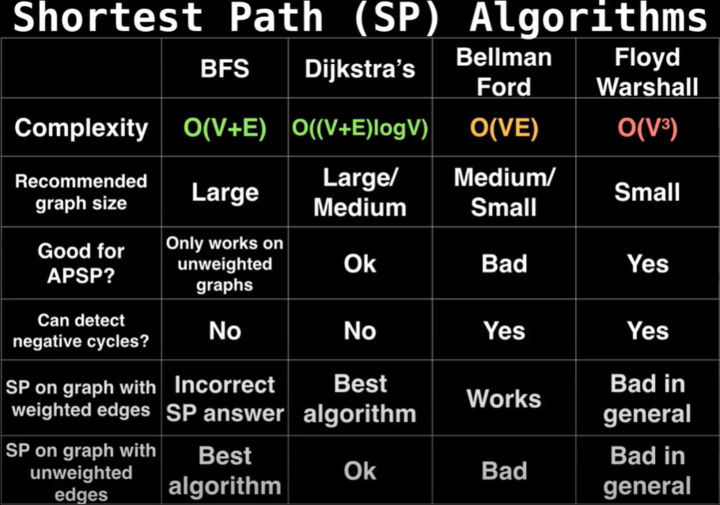